# TP4: Decision trees & random forests
The aim of this tutorial is to get familiar with the use of decision trees and their generalizations on simple examples using `scikit-learn` tools.

## Completing your installation first
You will need to install packages `python-graphviz` first. If needed, uncomment the `conda` command below:

In [1]:
# If needed, uncomment the line below:
# pip install graphviz

In [48]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
# Load the library with the iris dataset
from sklearn.datasets import load_iris, load_wine
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve
from sklearn.model_selection import cross_val_score
import seaborn as sns

# Load scikit's decision tree classifier
from sklearn import tree

# Load scikit's random forest classifier library
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import export_graphviz,DecisionTreeRegressor

# To visualize trees
import graphviz

# Load pandas to manipulate data frames (Excel like)
import pandas as pd

# Load numpy
#import numpy as np

# Set random seed
np.random.seed(0)

The data for this tutorial is famous. Called, **the iris dataset**, it contains four variables measuring various parts of iris flowers of three related species, and then a fourth variable with the species name. The reason it is so famous in machine learning and statistics communities is because the data requires very little preprocessing (i.e. no missing values, all features are floating numbers, etc.).

In [2]:
iris = load_iris()

## Step 1: explore the data set
1. What is the structure of the object `iris` ?

2. Plot this dataset in a well chosen set of representations to explore the data.

## Using `pandas` to manipulate the data
Pandas is great to manipulate data in a Microsoft Excel like way.

In [3]:
# Create a dataframe with the four feature variables
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Add a new column with the species names, this is what we are going to try to predict
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Step 2: create training and test sets

Create a new column that for each row, generates a random number between 0 and 1, and if that value is less than or equal to .75, then sets the value of that cell as True and false otherwise. This is a quick and dirty way of randomly assigning some rows to be used as the training data and some as the test data.

In [5]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# View the top 5 rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,True
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


In [6]:
# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

In [7]:
# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 118
Number of observations in the test data: 32


In [8]:
# Create a list of the feature column's names
features = df.columns[:4]

# View features
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [9]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

## Step 3: decision trees for the iris dataset
The method `tree.DecisionTreeClassifier()` from `scikit-learn` builds decision trees objects as follows:

In [10]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(train[features], y)

# Using the whole dataset you may use directly:
#clf = clf.fit(iris.data, iris.target)

The `export_graphviz` exporter supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

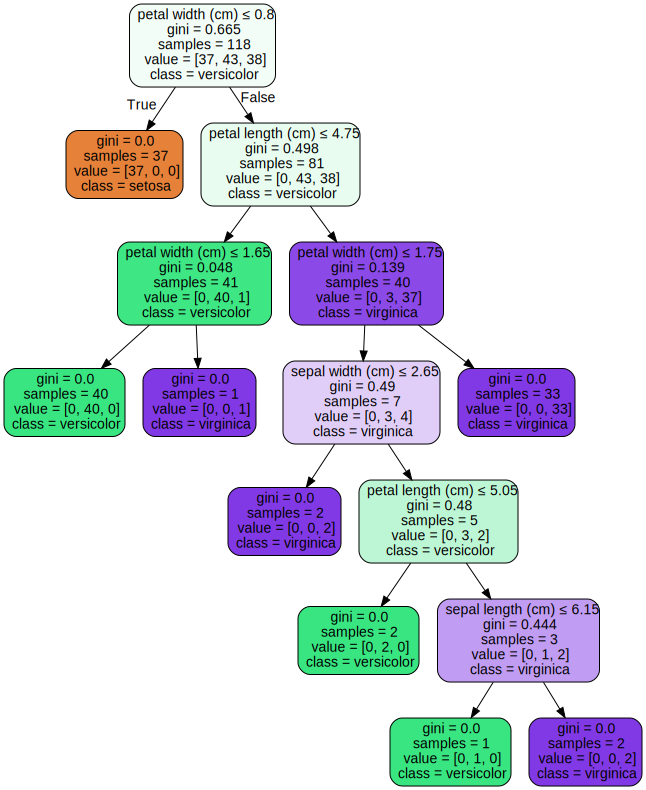

In [11]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

We can also export the tree in Graphviz format and  savethe resulting graph in an output file iris.pdf:

In [12]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

After being fitted, **the model can then be used to predict the class of samples**:

In [13]:
class_pred = clf.predict(iris.data[:1, :])
class_pred

C:\Users\gener\anaconda3\envs\tp_SDI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

## Exercise 1
1. Train the decision tree on the iris dataset and explain how one should read blocks in `graphviz` representation of the tree.

2. Plot the regions of decision with the points of the training set superimposed.

*Indication: you may find the function `plt.contourf` useful.

In [14]:
prop = 0.75
df['is_train'] = np.random.uniform(0, 1, len(df)) <= prop
train_iris, test_iris = df[df['is_train']==True], df[df['is_train']==False]
y = pd.factorize(train['species'])[0]

#Création de l'arbre
clf = tree.DecisionTreeClassifier()
#Entrainement sur le set d'entrainement
clf = clf.fit(train[features], y)

# Visualisation de l'arbre de décision avec Graphiz  :
#[EXTRAIT DOCU]
#filled :When set to True, paint nodes to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output.
#rounded :When set to True, draw node boxes with rounded corners.
#special_characters :When set to False, ignore special characters for PostScript compatibility.

# autres possibilités :
#impurity (default=True) :  When set to True, show the impurity at each node.
#proportion (default=False) : When set to True, change the display of ‘values’ and/or ‘samples’ to be proportions and percentages respectively.
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
#graph = graphviz.Source(dot_data)

**Comment lire le graphique de l'arbre donnée par graphviz**
L'arbre se lit de la façon suivante :
 1) Chaque rectangle correspond à une décision à prendre (selon un critère sur la donnée)
 2) Les "Feuilles" sont les terminaisons de l'arbre c'est à dire le moment ou il n'y a plus de décision à prendre, le graphique indique à quelle classe appartient la feuille
Ainsi grâce au graphique nous pouvons récupérer les attributs d'un élément et en suivant les décisions successives de l'arbre arriver à l'attribution d'une classe (faisable à la main dans ce cas car l'arbre n'est pas trop grand).

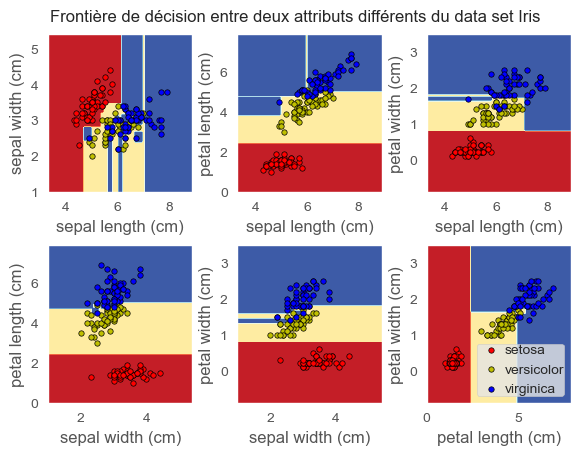

In [15]:
plt.style.use('ggplot')
attributs_names = train_iris.columns
# On affiche à chaque fois la décision sur deux attributs
for indices, attributs in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):

    X = iris.data[:, attributs]
    y = iris.target

    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Affichage de la frontière
    ax = plt.subplot(2, 3, indices + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    DecisionBoundaryDisplay.from_estimator(clf,X,cmap=plt.cm.RdYlBu,response_method="predict",ax=ax,
                                           xlabel=attributs_names[attributs[0]],
                                           ylabel=attributs_names[attributs[1]])
    # Affichage des points correspondants
    for i, color in zip(range(3), "ryb"):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0],X[idx, 1],c=color,label=train_iris['species'].unique()[i],cmap=plt.cm.RdYlBu,edgecolor="black",s=15)

plt.suptitle("Frontière de décision entre deux attributs différents du data set Iris")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)

Nous pouvons clairement voir sur ces graphgiques les zones délimitées par les séparations du type : $attribut > cst$
La mutiplication de décision sur ces attributs permet de séparer les données même si dans certains cas nous voyons que la séparation linéaire n'est pas possible.
Autrement dit, c'est la multitude de décisions linéaires par rapports aux attributs qui permet une prédiction.

## Exercise 2
1. Build 2 different trees based on a sepal features (sepal lengths, sepal widths) vs petal features (petal lengths, petal widths) only: which features are the most discriminant?

2. Compare performances with those obtained using all features.

3. Try the same as above using the various splitting criterion available, Gini's index, classification error or cross-entropy. Comment on your results.

In [16]:
#Recharge data propre :
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train_iris, test_iris = df[df['is_train']==True], df[df['is_train']==False]
features = df.columns[:4]
Y_train = pd.factorize(train_iris['species'])[0]
Y = pd.factorize(test_iris['species'])[0]

In [17]:
X_sepal = train_iris[['sepal width (cm)','sepal length (cm)']]
clf_sepal = tree.DecisionTreeClassifier().fit(X_sepal, Y_train)

X_petal = train_iris[['petal width (cm)','petal length (cm)']]
clf_petal = tree.DecisionTreeClassifier().fit(X_petal, Y_train)


class_pred_sepal = clf_sepal.predict(test_iris.iloc[:,0:2].to_numpy())
class_pred_petal = clf_petal.predict(test_iris.iloc[:,2:4].to_numpy())

#labels=['setosa', 'versicolor', 'virginica']
cM_petal=confusion_matrix(Y,class_pred_petal)
cM_sepal=confusion_matrix(Y,class_pred_sepal)

C:\Users\gener\anaconda3\envs\tp_SDI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\gener\anaconda3\envs\tp_SDI\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


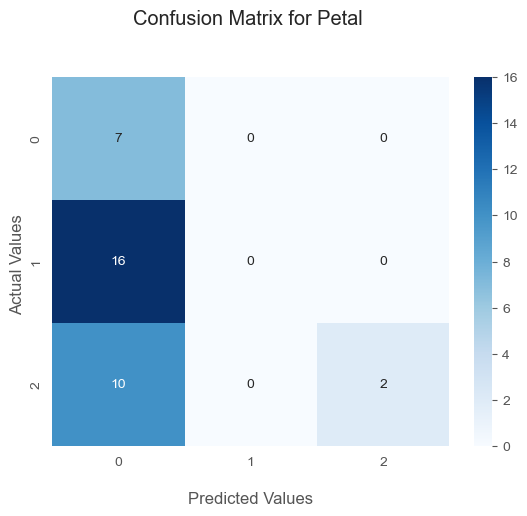

La précision du modèle avec uniquement les attributs Petal est de 0.2571


In [18]:
plt.figure()
ax = sns.heatmap(cM_petal, annot=True, cmap='Blues')
ax.set_title(f'Confusion Matrix for Petal \n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.show()
print(f"La précision du modèle avec uniquement les attributs Petal est de {round(accuracy_score(Y.ravel(),class_pred_petal),4)}")

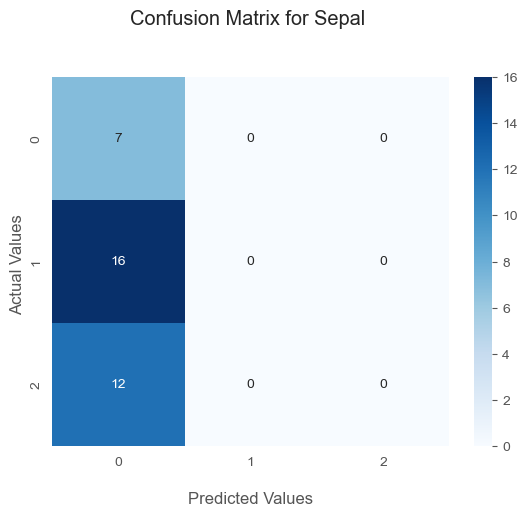

La précision du modèle avec uniquement les attributs Sepal est de 0.2


In [19]:
plt.figure()
ax2 = sns.heatmap(cM_sepal, annot=True, cmap='Blues')
ax2.set_title(f'Confusion Matrix for Sepal \n\n')
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ')

## Display the visualization of the Confusion Matrix.
plt.show()
print(f"La précision du modèle avec uniquement les attributs Sepal est de {round(accuracy_score(Y.ravel(),class_pred_sepal),4)}")

L'utilisation d'uniquement les features Petal permet légèrement plus de précision.
Cependant il est clair que n'utiliser qu'une partie des attributs n'est absolument pas suffisant comme nous pourrons le voir ci-dessous avec l'ensemble des features.

**Création de l'arbre avec tous les attributs disponibles**


In [20]:
#Recharge data propre :
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75
train, test = df[df['is_train']==True], df[df['is_train']==False]
features = df.columns[:4]
y = pd.factorize(train['species'])[0]
y_test = pd.factorize(test['species'])[0]

In [21]:
clf = tree.DecisionTreeClassifier()   #Gini par défaut
clf = clf.fit(train[features], y)

In [22]:
class_pred = clf.predict(test.iloc[:,0:4])
cM=confusion_matrix(y_test,class_pred)

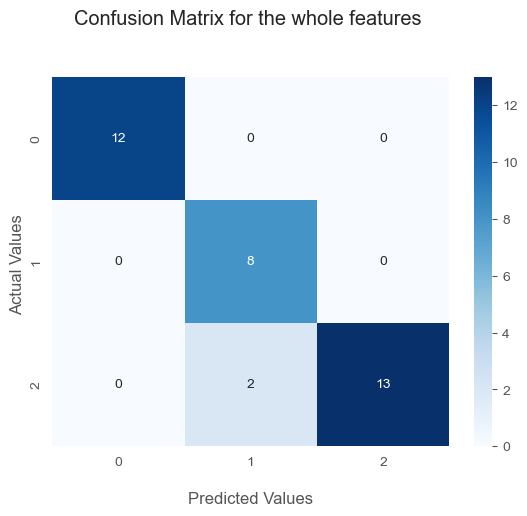

La précision du modèle est de 0.9429


In [23]:
plt.figure()
ax2 = sns.heatmap(cM, annot=True, cmap='Blues')
ax2.set_title(f'Confusion Matrix for the whole features \n\n')
ax2.set_xlabel('\nPredicted Values')
ax2.set_ylabel('Actual Values ')

## Display the visualization of the Confusion Matrix.
plt.show()
print(f"La précision du modèle est de {round(accuracy_score(class_pred,y_test.ravel()),4)}")

Dans ce cas, nous voyons une très claire augmentation de la précision avec cette fois moins de6% d'erreur.

Jouer avec les fonctions de pureté : criterion{“gini”, “entropy”, “log_loss”}, default=”gini”

In [24]:
clf_entropy = tree.DecisionTreeClassifier(criterion='entropy')
clf_entropy = clf_entropy.fit(train[features], y)

class_pred_entropy = clf_entropy.predict(test.iloc[:,0:4])

In [25]:
clf_log = tree.DecisionTreeClassifier(criterion='log_loss')
clf_log = clf_log.fit(train[features], y)

class_pred_log_loss = clf_log.predict(test.iloc[:,0:4])

In [26]:
print(f"La précision du modèle avec Gini est de {round(accuracy_score(class_pred,y_test.ravel()),4)}")
print(f"La précision du modèle avec Entropy est de {round(accuracy_score(class_pred_entropy,y_test.ravel()),4)}")
print(f"La précision du modèle avec Log-loss est de {round(accuracy_score(class_pred_log_loss,y_test.ravel()),4)}")

La précision du modèle avec Gini est de 0.9429
La précision du modèle avec Entropy est de 0.9429
La précision du modèle avec Log-loss est de 0.9429


### Going further ahead (not mandatory) 
Try the same approach adapted to another toy dataset from `scikit-learn` described at:
http://scikit-learn.org/stable/datasets/index.html

Play with another dataset available at:
http://archive.ics.uci.edu/ml/datasets.html

## Step 4: Random forests
Go to 

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 

for a documentation about the `RandomForestClassifier` provided by `scikit-learn`.

Since target values must be integers, we first need to transform labels into numbers as below.

In [27]:
# train['species'] contains the actual species names. Before we can use it,
# we need to convert each species name into a digit. So, in this case there
# are three species, which have been coded as 0, 1, or 2.
y = pd.factorize(train['species'])[0]

In [28]:
# Create a random forest Classifier. By convention, clf means 'Classifier'
rf = RandomForestClassifier(n_jobs=2, random_state=0)

# Train the Classifier to take the training features and learn how they relate
# to the training y (the species)
rf.fit(train[features], y)

RandomForestClassifier(n_jobs=2, random_state=0)

**Make predictions** and create actual english names for the plants for each predicted plant class:

In [29]:
preds = rf.predict(test[features])
preds_names = pd.Categorical.from_codes(preds, iris.target_names)
preds_names

['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'versicolor', 'virginica', 'virginica', 'virginica']
Length: 35
Categories (3, object): ['setosa', 'versicolor', 'virginica']

### Create a confusion matrix

In [30]:
# Create confusion matrix unsing pandas:
pd.crosstab(test['species'], preds, rownames=['Actual Species'], colnames=['Predicted Species'])

Predicted Species,0,1,2
Actual Species,,,
setosa,12,0,0
versicolor,0,8,0
virginica,0,2,13


## Feature selection using random forests byproducts

One of the interesting use cases for random forest is feature selection. One of the byproducts of trying lots of decision tree variations is that you can examine which variables are working best/worst in each tree.

When a certain tree uses one variable and another doesn't, you can compare the value lost or gained from the inclusion/exclusion of that variable. The good random forest implementations are going to do that for you, so all you need to do is know which method or variable to look at.

### View feature importance
While we don't get regression coefficients like with ordinary least squares (OLS), we do get a score telling us how important each feature was in classifying. This is one of the most powerful parts of random forests, because we can clearly see that petal width was more important in classification than sepal width.


In [31]:
# View a list of the features and their importance scores
list(zip(train[features], rf.feature_importances_))

[('sepal length (cm)', 0.09197002051012886),
 ('sepal width (cm)', 0.02815298039311056),
 ('petal length (cm)', 0.41376193566609754),
 ('petal width (cm)', 0.46611506343066306)]

## Exercise 3
1. Comment on the feature importances with respect to your previous observations on decision trees above.

2. Extract and visualize 5 trees belonging to the random forest using the attribute `estimators_` of the trained random forest classifier. Compare them. *Note that you may code a loop on extracted trees.*

3. Study the influence of parameters like `max_depth`, `min_samples_leaf` and `min_samples_split`. Try to optimize them and explain your approach and choices.

4. How is estimated the prediction error of a random forest ?
*Indication: have a look at parameter `oob_score`.*
What are out-of-bag samples ?

5. What should you do when classes are not balanced in the dataset ? (that is when there are much more examples of one class than another)

**Importance des Features**
L'extraction des features les plus importantes montre que les attributs "petal" ont bien plus d'impact sur la précision du modèle et donc sur la qualité de la prédiction.

In [32]:
trees=[]
for i in range (0,5) :
    trees.append(export_graphviz(rf.estimators_[i],
                             feature_names=iris.feature_names,
                             class_names=iris.target_names,
                            filled=True, impurity=True,
                            rounded=True))
graphs=[]
for tree in trees :
    graphs.append(graphviz.Source(tree, format='png'))


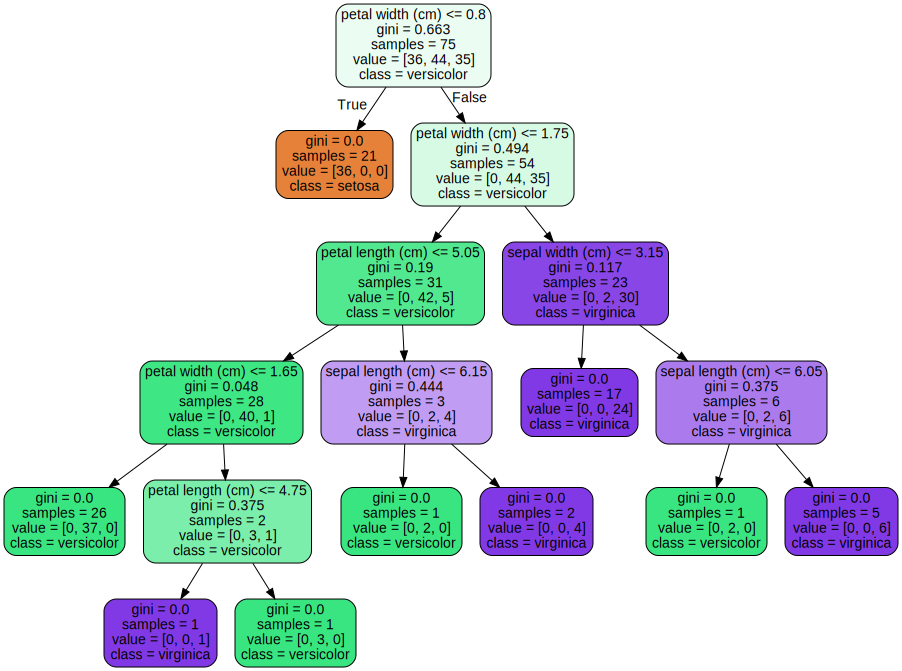

In [33]:
graphs[4]

**Evolution de la précision en changeant les paramètres indépendemment**
Nous allons d'abord comprendre l'impacte de chaque paramètre et décider ensuite de la façon d'optimiser le choix de ceux-là combinés.


In [34]:
def name_iris_ind(position):
    if position==0:
        return 'sepal length'
    if position==1:
        return 'sepal width'
    if position==2:
        return 'petal lenght'
    return 'petal width'

**Max depth**

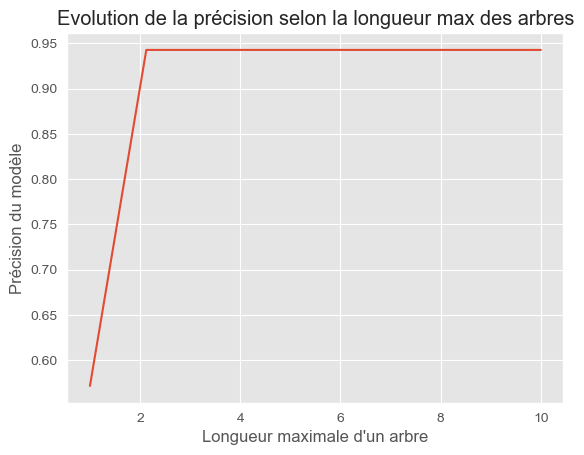

Evolution des meilleurs attributs
['petal lenght', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width']


In [35]:
lim_depth = 10
tab_accuracy=[]
best_variable=[]
for depth in range(1,lim_depth):
    rf = RandomForestClassifier(n_jobs=2, random_state=0,max_depth=depth)
    rf.fit(train[features], y)
    preds = rf.predict(test[features])
    preds_names = pd.Categorical.from_codes(preds, iris.target_names)
    tab_accuracy.append(accuracy_score(preds_names, test['species']))
    best_variable.append(name_iris_ind(argmax(list(rf.feature_importances_))))
plt.figure()
plt.plot(np.linspace(1,lim_depth,lim_depth-1),tab_accuracy)
plt.title("Evolution de la précision selon la longueur max des arbres")
plt.xlabel("Longueur maximale d'un arbre")
plt.ylabel("Précision du modèle")
plt.show()
print("Evolution des meilleurs attributs")
print(best_variable)

Cette première courbe nous montre qu'il est inutile de créer des arbres trop long, une longueur maximale de 2 est déjà suffisant pour prendre une décision
correcte.
Ici l'évolution des meilleurs attributs ne donne pas d'info supplémentaire si ce n'est que petal width est l'attribut le plus important.

**Min sample leaf**

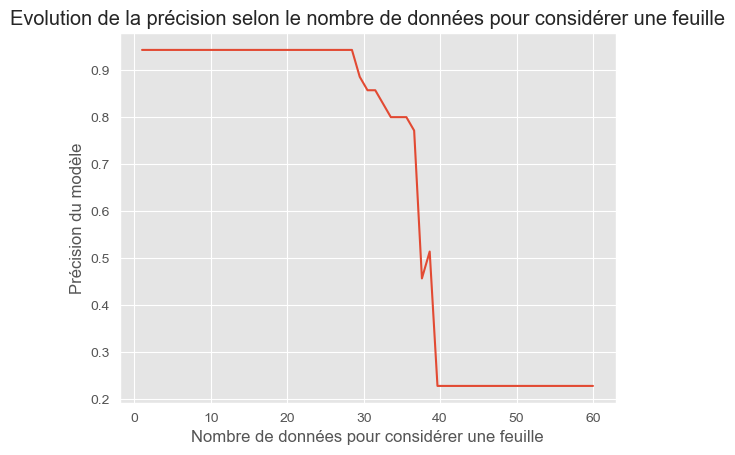

Evolution des meilleurs attributs
['petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'sepal length', 'sepal length', 'petal lenght', 'petal lenght', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length', 'sepal length']


In [36]:
lim_sample_leaf = 60
tab_accuracy_leaf=[]
best_variable_leaf=[]
for sample_leaf in range(1,lim_sample_leaf):
    rf = RandomForestClassifier(n_jobs=2, random_state=0,min_samples_leaf=sample_leaf)
    rf.fit(train[features], y)
    preds = rf.predict(test[features])
    preds_names = pd.Categorical.from_codes(preds, iris.target_names)
    tab_accuracy_leaf.append(accuracy_score(preds_names, test['species']))
    best_variable_leaf.append(name_iris_ind(argmax(list(rf.feature_importances_))))
plt.figure()
plt.plot(np.linspace(1,lim_sample_leaf,lim_sample_leaf-1),tab_accuracy_leaf)
plt.title("Evolution de la précision selon le nombre de données pour considérer une feuille")
plt.xlabel("Nombre de données pour considérer une feuille")
plt.ylabel("Précision du modèle")
plt.show()
print("Evolution des meilleurs attributs")
print(best_variable_leaf)
#argmax(tab_accuracy_leaf[25:])     # 32 -> pic

Ce paramètre permet de régler le nombre de données pour que le modèle considère qu'il s'agit d'une feuille (par défaut 1).
Cette courbe montre que considérer jusqu'a 28 données par feuille n'impacte pas la précision.

**Min sample splits**

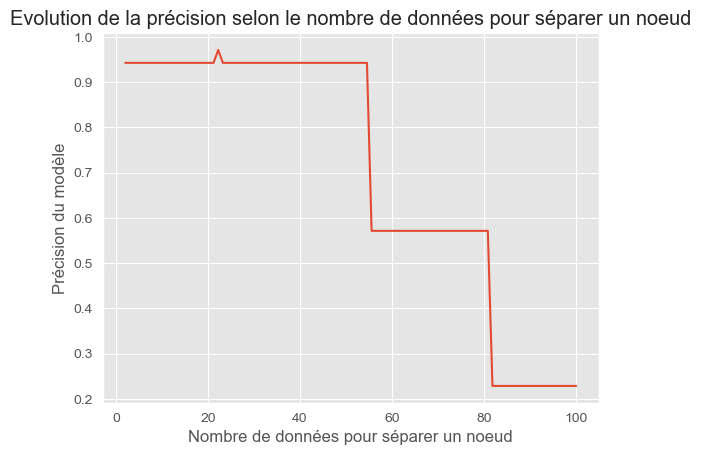

Evolution des meilleurs attributs
['petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal width', 'petal lenght', 'petal lenght', 'petal lenght', 'petal width', 'petal width', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'petal lenght', 'pet

In [37]:
lim_sample_split = 100
tab_accuracy_split=[]
best_variable_split=[]
for sample_split in range(2,lim_sample_split):
    rf = RandomForestClassifier(n_jobs=2, random_state=0,min_samples_split=sample_split)
    rf.fit(train[features], y)
    preds = rf.predict(test[features])
    preds_names = pd.Categorical.from_codes(preds, iris.target_names)
    tab_accuracy_split.append(accuracy_score(preds_names, test['species']))
    best_variable_split.append(name_iris_ind(argmax(list(rf.feature_importances_))))
plt.figure()
plt.plot(np.linspace(2,lim_sample_split,lim_sample_split-2),tab_accuracy_split)
plt.title("Evolution de la précision selon le nombre de données pour séparer un noeud")
plt.xlabel("Nombre de données pour séparer un noeud")
plt.ylabel("Précision du modèle")
plt.show()
print("Evolution des meilleurs attributs")
print(best_variable_split)

Le nombre de données que le classifieur va considérer pour définir la séparation d'un noeud n'a pas forcément besoind'être 2. Autrement dit une séparation parfaite n'est pas nécessaire. Cela rejoint le paramètre de max_depth car en limitant drastiquement la longueur maximale de l'arbre, le classifieur ne pourra de toute façon pas séparer les données.
Ce que nous montre ce graphique est donc : (avec les autres paramètres par défaut )
- Une séparation d'un noeud en dessous de 47 n'est pas nécessaire

--> Cependant le paramètre de longueur de l'arbre étant arbitraire, le modèle compense probablement cela avec un plus grand nombre de décisions.

Evolution des attributs
L'évolution des meilleurs attributs nous montre que certains attributs sont plus eficace pour séparer les données avec peu dedécisions possibles.
Par exemple avec une longueur maximale de 2 pour un arbre, l'attribut le plus discriminant est "petal width", il permet probablement de fortement séparer en une question les données

**Conclusion**
L'influence de ces paramètres nous indique qu'il n'est pas nécessaire de créer de grands arbres ou de chercher à séparer très précisément les données. La force d'une forêt aléatoire est justement d'avoir une bonne précision via une multitude de décisions peu couteuses (pleins de petits arbres par exemple).
Cependant utiliser chaque valeur "optimale" au-dessus dans un même modèle ne peut pas se faire directement car comme expliqué plus haut, ces paramètre qui influencent la précision ne sont pas indépendant.
--> Créer un abre très court (max depth = 2) avec une séparation d'un noeud grande( min_sample_split=40) va trop impacter la précision et dans ce cas l'abre ne pourra pas faire une bonne prédiction.

Test d'un modèle avec l'ensemble de ces paramètres :
Nous proposons ici une forêt aléatoire avec l'ensemble de paramètres mis de façon à avoir un ensemble peu côuteux et garder une précision correcte.

Précisions :
Avec les paramètres par défaut : 0.9429
Avec des paramètres plus léger : 0.9428

In [38]:
rf = RandomForestClassifier(n_jobs=2, random_state=0,min_samples_split=45,min_samples_leaf=20,max_depth=2)
rf.fit(train[features], y)
preds = rf.predict(test[features])
preds_names = pd.Categorical.from_codes(preds, iris.target_names)
print(f"La précision est de  : {accuracy_score(preds_names, test['species'])}")
print(f"L'attribut le plus important est : {name_iris_ind(argmax(list(rf.feature_importances_)))}")

La précision est de  : 0.9428571428571428
L'attribut le plus important est : petal width


Finalement nous avons gardé la même précision mais avec une modèle beaucoup plus léger (et plus lisible).
--> Décisions vont directement à l'essentiel

Sur de grands jeux de données ou des forêts plus grandes, cette différence est un atout majeur.

**Estimation de l'erreur**

Le validation score utilise une partie de l'ensemble de données de formation d'origine qui est en fait mise de côté avant la formation des modèles.
De plus il est calculé en utilisant toutes les données de l'ensemble.

OOB score (ou "out of bag" score) est en fait une façon d'utiliser la cross-validation pour une forêt aléatoire. Une partie des données n'est pas utilisées pour l'entrainement mais sert par la suite à valider la décision prise par la forêt. C'est utile lorsque nous n'avons pas beacoup de données.


**Unbalanced DataSet**
Plusieurs options sont envisageables :
- augmenter le nombre de données de la classe sous-représentée avec de la data-augmentation
- Créer des set d'entrainement (bagging ou forêt aléatoire) qui comportent les données de la classe sous-représentée (toujours les mêmes? changer quand même le nombre ?) et différentes données des autres classes. Ainsi chaque set d'entrainement aura une proportion égale de la classe sous-représentée mais qui reste bien plus grande que celle de l'ensemble d'apprentissage en entier. On conserve ainsi la robustesse des forêts aléatoires tout en atténuant l'effet "unbalanced"

## Step 5: a small example of regression using random forests
Random forest is capable of learning without carefully crafted data transformations. Take the the $f(x) = \sin(x)$ function for example.

Create some fake data and add a little noise.

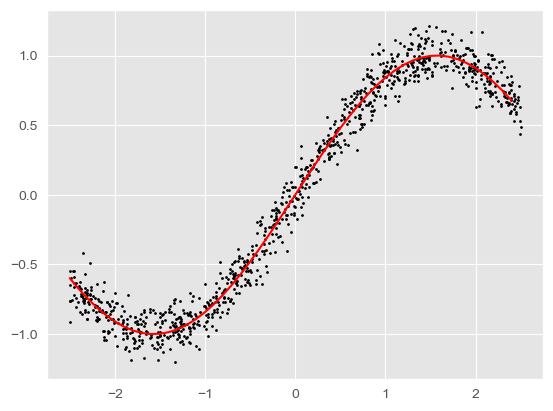

In [39]:
x = np.random.uniform(-2.5, 2.5, 1000)
y = np.sin(x) + np.random.normal(0, .1, 1000)

plt.plot(x,y,'ko',markersize=1,label='data')
plt.plot(np.arange(-2.5,2.5,0.1),np.sin(np.arange(-2.5,2.5,0.1)),'r-',label='ref')
plt.show()

If we try and build a basic linear model to predict y using x we end up with a straight line that sort of bisects the sin(x) function. Whereas if we use a random forest, it does a much better job of approximating the sin(x) curve and we get something that looks much more like the true function.

Based on this example, we will illustrate how the random forest isn't bound by linear constraints.

## Exercise 4
1. Apply random forests on this dataset for regression and compare performances with ordinary least squares regression.
*Note that ordinay least square regression is available thanks to:
from sklearn.linear_model import LinearRegression*

2. Comment on your results.

### Indications:
You may use half of points for training and others to test predictions. Then you will have an idea of how far the random forest predictor fits the sinus curve.

To this aim, you will need to use the model `RandomForestRegressor`. Be careful that when only 1 feature `x` is used as an input, you will need to reshape it by `x.reshape(-1,1)` when using methods `fit` and `predict`.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
df_sin = pd.DataFrame({'x':x,'f(x)':y})
df_train,df_test = train_test_split(df_sin, test_size=0.33, random_state=42)

In [41]:
reg = LinearRegression().fit(df_train['x'].values.reshape(-1, 1), df_train['f(x)'].values.reshape(-1, 1))
score_reg = reg.score(df_test['x'].values.reshape(-1, 1), df_test['f(x)'].values.reshape(-1, 1))

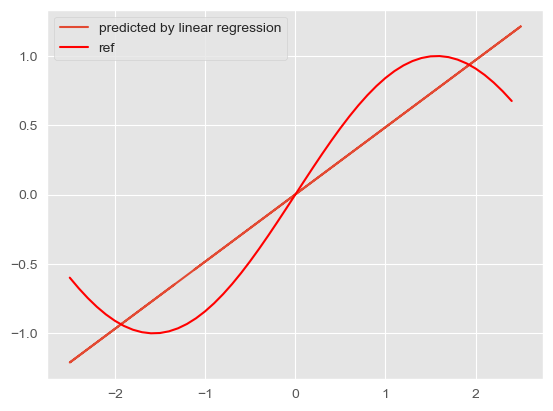

In [42]:
plt.figure()
plt.plot(df_test['x'].values.reshape(-1, 1),reg.predict(df_test['x'].values.reshape(-1, 1)),label='predicted by linear regression')
plt.plot(np.arange(-2.5,2.5,0.1),np.sin(np.arange(-2.5,2.5,0.1)),'r-',label='ref')
plt.legend()

In [43]:
regrf = RandomForestRegressor(n_estimators=30, max_depth=4)
regrf.fit(df_train['x'].values.reshape(-1, 1),df_train['f(x)'].values.reshape(-1,1))
scoreForest = regrf.score(df_test['x'].values.reshape(-1,1),df_test['f(x)'].values.reshape(-1,1))

C:\Users\gener\AppData\Local\Temp\ipykernel_29164\3837825050.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regrf.fit(df_train['x'].values.reshape(-1, 1),df_train['f(x)'].values.reshape(-1,1))


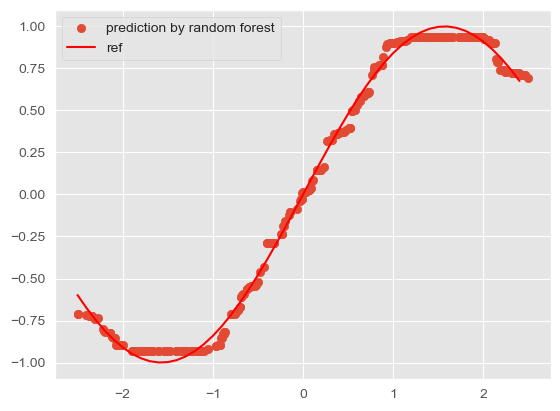

In [44]:
plt.figure()
plt.scatter(df_test['x'].values.reshape(-1,1),regrf.predict(df_test['x'].values.reshape(-1,1)),label='prediction by random forest')
plt.plot(np.arange(-2.5,2.5,0.1),np.sin(np.arange(-2.5,2.5,0.1)),'r-',label='ref')
plt.legend()

Graphiquement il est très rapide de voir que le classifieur linéaire donne une prédiction grossière (c'est normal).
La forêt aléatoire est composée d'une multitude de décisions linéaires sur les attributs. Il est très clair sur le schéma que cela permet d'apprendre des comportements non-linéaires.
Pour comparer plus clairement les modèles et avoir une meilleure estimation de la précision de tels modèles, nous allons effectuer une cross-validation :

On rajoute un arbre de Régression pour comparer

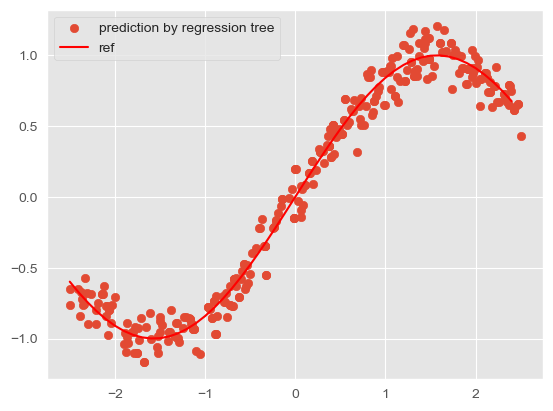

In [47]:
clf_decisionTree = DecisionTreeRegressor().fit(df_train['x'].values.reshape(-1, 1),df_train['f(x)'].values.reshape(-1,1))

plt.figure()
plt.scatter(df_test['x'].values.reshape(-1,1),clf_decisionTree.predict(df_test['x'].values.reshape(-1,1)),label='prediction by regression tree')
plt.plot(np.arange(-2.5,2.5,0.1),np.sin(np.arange(-2.5,2.5,0.1)),'r-',label='ref')
plt.legend()

scoreDecisionTree = clf_decisionTree.score(df_test['x'].values.reshape(-1,1),df_test['f(x)'].values.reshape(-1,1))

In [49]:
reg = LinearRegression()
regrf = RandomForestRegressor(n_estimators=30, max_depth=4)
clf_decisionTree = tree.DecisionTreeRegressor()
croo_score_regressionLineraire = cross_val_score(reg, df_train['x'].values.reshape(-1,1),df_train['f(x)'].values.reshape(-1,1), cv=10)
cross_score_RandomForest = cross_val_score(regrf,df_train['x'].values.reshape(-1,1),df_train['f(x)'].values.reshape(-1,1), cv=10)
cross_score_regressionTree = cross_val_score(clf_decisionTree,df_train['x'].values.reshape(-1,1),df_train['f(x)'].values.reshape(-1,1), cv=10)

C:\Users\gener\anaconda3\envs\tp_SDI\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gener\anaconda3\envs\tp_SDI\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gener\anaconda3\envs\tp_SDI\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\gener\anaconda3\envs\tp_SDI\lib\site-packages\sklearn\model_selection\_validation.py:

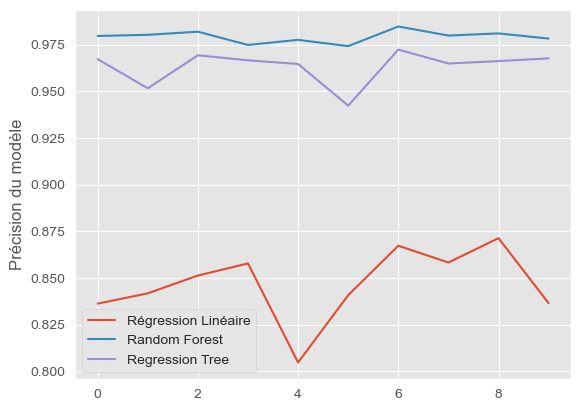

In [50]:
plt.figure()
plt.plot(croo_score_regressionLineraire,label='Régression Linéaire')
plt.plot(cross_score_RandomForest,label='Random Forest')
plt.plot(cross_score_regressionTree,label='Regression Tree')
plt.ylabel("Précision du modèle")
plt.legend()

In [51]:
print(f"Précision de la forêt aléatoire      : {round(cross_score_RandomForest.mean(),4)}")
print(f"Précision de la régression linéaire  : {round(croo_score_regressionLineraire.mean(),4)}")
print(f"Précision de l'abre de régression    : {round(cross_score_regressionTree.mean(),4)}")

Précision de la forêt aléatoire      : 0.9792
Précision de la régression linéaire  : 0.8466
Précision de l'abre de régression    : 0.9632


### Indication
One clever way to compare models when using `scikit-learn`is to make a loop on models as follows:

In [ ]:
models = [DecisionTreeClassifier(max_depth=None),
          RandomForestClassifier(n_estimators=n_estimators)]
for model in models:
    ...

## Documentation

### Decision trees
http://scikit-learn.org/stable/modules/tree.html

### Random forests
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

### Plot decision surface : using `plt.contourf`
http://scikit-learn.org/stable/auto_examples/tree/plot_iris.html#sphx-glr-auto-examples-tree-plot-iris-py


## Pruning trees: not available in scikit-learn.
Since post-pruning of tree is not implemented in scikit-learn, you may think of coding your own pruning function. For instance, taking into account the numer of samples per leaf as proposed below:

In [ ]:
# Pruning function (useful ?)
def prune(decisiontree, min_samples_leaf = 1):
    if decisiontree.min_samples_leaf >= min_samples_leaf:
        raise Exception('Tree already more pruned')
    else:
        decisiontree.min_samples_leaf = min_samples_leaf
        tree = decisiontree.tree_
        for i in range(tree.node_count):
            n_samples = tree.n_node_samples[i]
            if n_samples <= min_samples_leaf:
                tree.children_left[i]=-1
                tree.children_right[i]=-1
